Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

Mean Squared Error: 5183086.7482767245


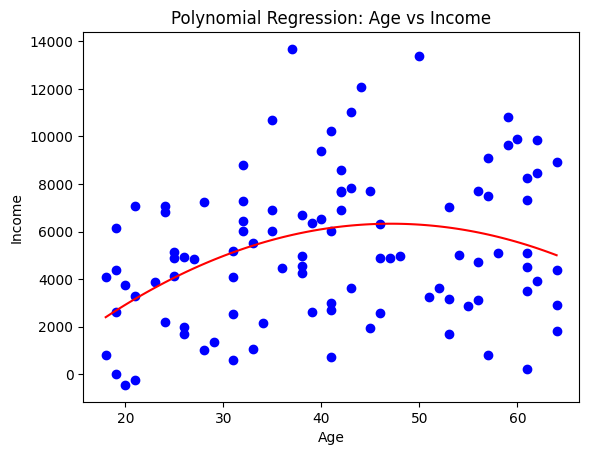

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for testing
np.random.seed(42)
ages = np.random.randint(18, 65, 100)  # Random ages between 18 and 65
income = 3000 + ages * 50 + np.random.normal(0, 3000, 100)  # Income roughly based on age with some noise

# Create a DataFrame
data = pd.DataFrame({'Age': ages, 'Income': income})

# Extract Age and Income columns
X = data['Age'].values.reshape(-1, 1)  # Features (Age)
y = data['Income'].values  # Target (Income)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree 2 for quadratic regression, adjust if needed)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the original data points
plt.scatter(X, y, color='blue')

# Plot the polynomial regression curve
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # For smooth curve
X_grid_poly = poly.transform(X_grid)
y_grid = model.predict(X_grid_poly)
plt.plot(X_grid, y_grid, color='red')

# Set plot labels and title
plt.title('Polynomial Regression: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

Mean Squared Error (Linear Regression): 4534617.637120253
Mean Squared Error (Polynomial Regression): 5672818.62288976


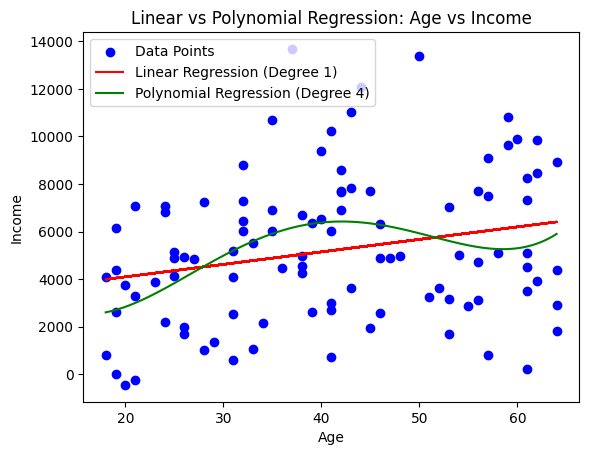

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for testing (you can replace this with your own dataset)
np.random.seed(42)
ages = np.random.randint(18, 65, 100)  # Random ages between 18 and 65
income = 3000 + ages * 50 + np.random.normal(0, 3000, 100)  # Income roughly based on age with some noise

# Create a DataFrame
data = pd.DataFrame({'Age': ages, 'Income': income})

# Extract Age and Income columns
X = data['Age'].values.reshape(-1, 1)  # Features (Age)
y = data['Income'].values  # Target (Income)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------- Simple Linear Regression --------------------------

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions with linear regression
y_pred_linear = linear_model.predict(X_test)

# ---------------------- Higher-Degree Polynomial Regression -------------------

# Apply Polynomial Features (degree 4 for higher-degree fitting)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions with polynomial regression
y_pred_poly = poly_model.predict(X_test_poly)

# ----------------------------- Evaluation ------------------------------
# Calculate Mean Squared Error for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

# ----------------------------- Visualization ---------------------------

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the simple linear regression line
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression (Degree 1)')

# Plot the polynomial regression curve
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # For smooth curve
X_grid_poly = poly.transform(X_grid)
y_grid = poly_model.predict(X_grid_poly)
plt.plot(X_grid, y_grid, color='green', label='Polynomial Regression (Degree 4)')

# Set plot labels and title
plt.title('Linear vs Polynomial Regression: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

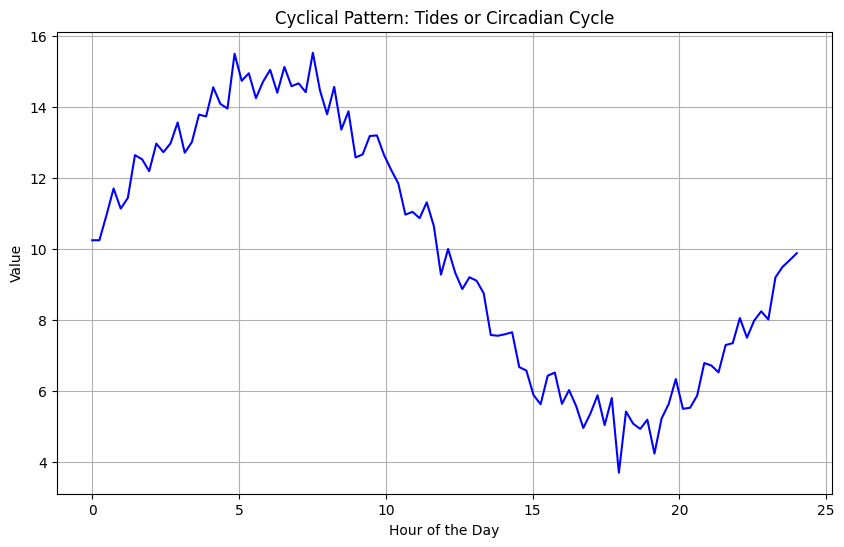

Mean Squared Error: 0.19792109879685932


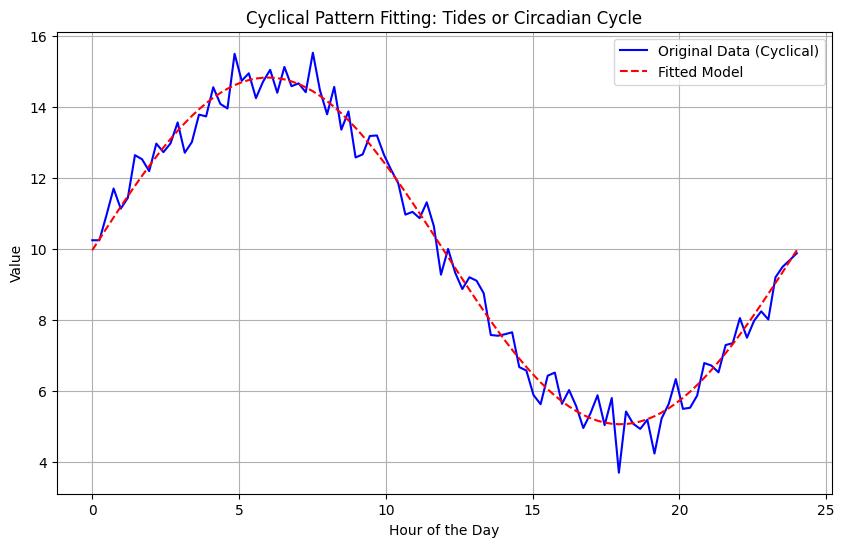

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset with cyclical pattern (e.g., Circadian rhythm or tide data)
np.random.seed(42)

# Create a time variable (e.g., hours of the day)
hours = np.linspace(0, 24, 100)  # 100 points for 24 hours
# Generate a synthetic cyclical pattern (sine wave + some noise)
tides_or_temp = 10 + 5 * np.sin(2 * np.pi * hours / 24) + np.random.normal(0, 0.5, hours.shape[0])

# Create DataFrame
data = pd.DataFrame({'Hour': hours, 'Value': tides_or_temp})

# Visualize the synthetic cyclical pattern
plt.figure(figsize=(10, 6))
plt.plot(data['Hour'], data['Value'], label='Tides or Circadian Pattern', color='blue')
plt.title('Cyclical Pattern: Tides or Circadian Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# ---------------------------- Handle Cyclical Nature ----------------------------

# Convert the time (hour of the day) into sine and cosine components
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)

# Define the features and target
X = data[['Hour_sin', 'Hour_cos']]  # Features: sine and cosine of hour
y = data['Value']  # Target: Value (e.g., tide height or temperature)

# ------------------------ Train a Linear Regression Model ------------------------
# Train a linear regression model to fit the cyclical data
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model (Mean Squared Error)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# ---------------------------- Visualization of the Fitted Model ----------------------

# Visualize the original data vs the model's predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Hour'], data['Value'], label='Original Data (Cyclical)', color='blue')
plt.plot(data['Hour'], y_pred, label='Fitted Model', color='red', linestyle='--')
plt.title('Cyclical Pattern Fitting: Tides or Circadian Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
